<a href="https://colab.research.google.com/github/EmanSalah2000/AutoEncoder_MNIST/blob/main/AutoEncoderfor_mnist_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras
from keras import layers
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
import random

In [ ]:
input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

In [ ]:
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 8)           584   

In [ ]:
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

autoencoder.fit(x_train, x_train,
                epochs=5, #5, #50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

for a in (autoencoder.weights):
  print (a.shape)


11501568/11490434 [==============================] - 0s 0us/step
Epoch 1/5
469/469 [==============================] - 75s 159ms/step - loss: 0.2038 - val_loss: 0.1523
Epoch 2/5
469/469 [==============================] - 74s 159ms/step - loss: 0.1417 - val_loss: 0.1324
Epoch 3/5
469/469 [==============================] - 74s 157ms/step - loss: 0.1287 - val_loss: 0.1231
Epoch 4/5
469/469 [==============================] - 73s 156ms/step - loss: 0.1206 - val_loss: 0.1163
Epoch 5/5
469/469 [==============================] - 73s 156ms/step - loss: 0.1153 - val_loss: 0.1121
(3, 3, 1, 16)
(16,)
(3, 3, 16, 8)
(8,)
(3, 3, 8, 8)
(8,)
(3, 3, 8, 8)
(8,)
(3, 3, 8, 8)
(8,)
(3, 3, 8, 16)
(16,)
(3, 3, 16, 1)
(1,)


In [ ]:
encoded_input = keras.Input(shape=(4, 4, 8))

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded_input)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

encoder = keras.Model(input_img, encoded)
decoder = keras.Model(encoded_input, decoded)

In [ ]:
k = 0
for i in range (0,14):
    print(autoencoder.weights[i].shape)
    k = k+1
print("==========================================")
k = 0
for i in range (6,14):
    print(decoder.weights[k].shape)
    k = k+1
k = 0
print("==========================================")
for i in range (6,14):
    decoder.weights[k].assign(autoencoder.weights[i])
    k = k+1
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)
decoded_imgs.shape

(3, 3, 1, 16)
(16,)
(3, 3, 16, 8)
(8,)
(3, 3, 8, 8)
(8,)
(3, 3, 8, 8)
(8,)
(3, 3, 8, 8)
(8,)
(3, 3, 8, 16)
(16,)
(3, 3, 16, 1)
(1,)
(3, 3, 8, 8)
(8,)
(3, 3, 8, 8)
(8,)
(3, 3, 8, 16)
(16,)
(3, 3, 16, 1)
(1,)


(10000, 28, 28, 1)

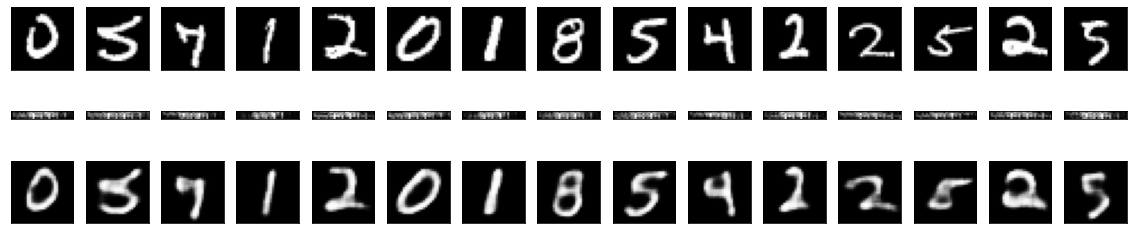

In [ ]:
n = 15  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    k = random.randint(0,9999)
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[k].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # encoded image
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(encoded_imgs[k].reshape((4, 4 * 8)))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(3, n, i + 1 + n + n)
    plt.imshow(decoded_imgs[k].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


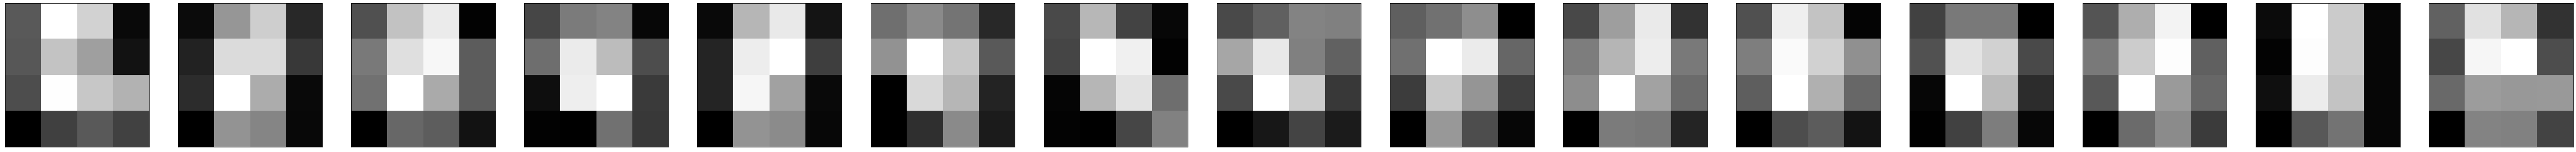

In [ ]:
n = 15
plt.figure(figsize=(100, 100))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(encoded_imgs[i,:,:,1].reshape((4, 4)))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()